In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("loan_approval.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(381, 13)

In [6]:
# The data contains numerical as well as categorical data

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


# Data Cleaning

Null values

In [8]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace = True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace = True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace = True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace = True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace = True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\Mangesh\anaconda3\envs\cpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Loan_Amount_Term'>

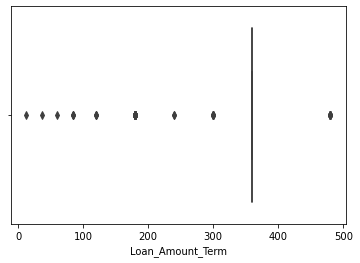

In [11]:
sns.boxplot(df["Loan_Amount_Term"])

In [12]:
df.Loan_Amount_Term.unique() 

array([360., 120., 240., 180.,  60., 300., 480.,  84.,  12.,  36.])

In [13]:
df["Credit_History"].fillna(df["Credit_History"].mean(),inplace = True)


In [14]:
df.drop(["Loan_ID"],axis=1,inplace=True)

# Label Encoding

In [15]:
dummy=pd.get_dummies(df, columns = ['Gender', 'Married',"Education",'Dependents','Self_Employed','Property_Area'])
dummy

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
1,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
2,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,...,1,1,0,0,0,1,0,0,0,1
3,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,2333,1516.0,95.0,360.0,1.0,Y,0,1,0,1,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
377,3232,1950.0,108.0,360.0,1.0,Y,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
378,2900,0.0,71.0,360.0,1.0,Y,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
379,4106,0.0,40.0,180.0,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,1,0,0


# Removing Dummy variable trap

In [16]:
dummy.drop(['Gender_Female', 'Married_No',"Education_Graduate",'Dependents_0','Self_Employed_No','Property_Area_Rural'],axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
dummy['Loan_Status'] = LabelEncoder().fit_transform(dummy['Loan_Status'])

In [18]:
dummy.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [19]:
dummy.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,0,0
1,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
2,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,0,0,0,0,1
3,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
4,2333,1516.0,95.0,360.0,1.0,1,1,1,1,0,0,0,0,0,1


# Model Building


In [20]:
x=dummy.drop("Loan_Status",axis="columns")
y=dummy["Loan_Status"]
from sklearn import metrics 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split (x,y, test_size=0.3)

In [21]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(xtrain,ytrain)
y_train_predicted= model1.predict(xtrain)
y_test_predicted= model1.predict(xtest)
accuracy = metrics.accuracy_score(ytrain, y_train_predicted)
accuracy_percentage = 100 * accuracy
print("train_accuracy = " , accuracy_percentage, "%")
accuracy = metrics.accuracy_score(ytest, y_test_predicted)
accuracy_percentage = 100 * accuracy
print("test_accuracy = " , accuracy_percentage, "%")

train_accuracy =  84.58646616541353 %
test_accuracy =  83.47826086956522 %


C:\Users\Mangesh\anaconda3\envs\cpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(xtrain,ytrain)
y_train_predicted= model2.predict(xtrain)
y_test_predicted= model2.predict(xtest)
accuracy = metrics.accuracy_score(ytrain, y_train_predicted)
accuracy_percentage = 100 * accuracy
print("train_accuracy = " , accuracy_percentage, "%")
accuracy = metrics.accuracy_score(ytest, y_test_predicted)
accuracy_percentage = 100 * accuracy
print("test_accuracy = " , accuracy_percentage, "%")

train_accuracy =  100.0 %
test_accuracy =  77.39130434782608 %


In [23]:
from sklearn.ensemble import RandomForestClassifier
model3= RandomForestClassifier()
model3.fit(xtrain,ytrain)
y_train_predicted= model3.predict(xtrain)
y_test_predicted= model3.predict(xtest)
accuracy = metrics.accuracy_score(ytrain, y_train_predicted)
accuracy_percentage = 100 * accuracy
print("train_accuracy = " , accuracy_percentage, "%")
accuracy = metrics.accuracy_score(ytest, y_test_predicted)
accuracy_percentage = 100 * accuracy
print("test_accuracy = " , accuracy_percentage, "%")

train_accuracy =  100.0 %
test_accuracy =  84.34782608695653 %


In [24]:
from sklearn.svm import SVC
model4=SVC()
model4.fit(xtrain,ytrain)
y_train_predicted= model4.predict(xtrain)
y_test_predicted= model4.predict(xtest)
accuracy = metrics.accuracy_score(ytrain, y_train_predicted)
accuracy_percentage = 100 * accuracy
print("train_accuracy = " , accuracy_percentage, "%")
accuracy = metrics.accuracy_score(ytest, y_test_predicted)
accuracy_percentage = 100 * accuracy
print("test_accuracy = " , accuracy_percentage, "%")

train_accuracy =  71.05263157894737 %
test_accuracy =  72.17391304347827 %


In [25]:
import pickle
with open("Loan_Approval_Prediction_Model","wb") as f:
  pickle.dump(model3,f)